In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

In [8]:
def weight_init(method, N, tickers):
    if method == 'equal':
        w = np.ones(N)
        return w.astype('int64')
    
    elif method == 'marketcap':
        for w in tickers:
            try:
                w += [int(caps[w])]
                
            except KeyError:
                w += [0] 
                # weight to 0 if not found b/c first "ticker" = 'Unnamed: 0' and didn't want to change code 
                
        return np.array(w).astype('int64')

In [9]:
def expo_gradient(x, w, eta):
    """Take in a vector of price relatives and weights and output updated weights
    Parameters
    x (np.array) - vector of price relatives, N x 1
    w (np.array) - vector of weights, N x 1
    eta (float) - learning rate
    
    Return:
    w (np.array) - updated weights
    """
    w = w * np.exp(eta * x / (w @ x)) / (w * np.exp(eta * x / (w @ x))).sum()
    return w

In [10]:
def expo_gradient2(x, w, eta, alpha):
    """Take in a vector of price relatives and weights and output updated weights
    Parameters
    x (np.array) - vector of price relatives, N x 1
    w (np.array) - vector of weights, N x 1
    eta (float) - learning rate
    alpha (float) - parameter
    
    Return:
    w (np.array) - updated weights
    """
    x = (1 - alpha / x.size) * x  + (alpha / x.size) * np.ones(x.size)
    w = w * np.exp(eta * x / (w @ x)) / (w * np.exp(eta * x / (w @ x))).sum()
    #w = (1 - alpha / w.size) * w  + (alpha / w.size) * np.ones(w.size)
    return w

In [14]:
def run(data, method='equal'):
    N = data.shape[1]
    T = data.shape[0]
    
    tickers = data.columns
    w = weight_init(method, N, tickers)
    
    alpha = (N**2 * np.log(N) / ((8 * T)))**0.25
    eta = np.sqrt(8 * alpha**2 * np.log(N) / (N**2 / T))
    
    for index, x in data.iterrows():
        w = expo_gradient2(x, w, eta, alpha)   
        
    return w

In [15]:
data = pd.read_excel('trading_data.xlsx', index_col=0) + 1

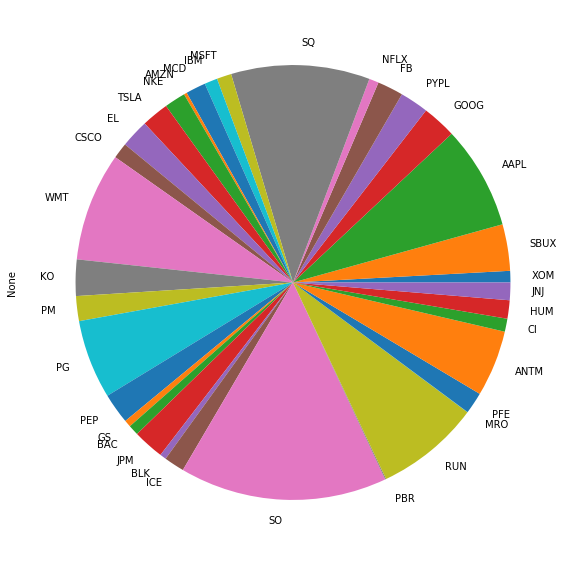

In [16]:
plot = run(data).plot.pie(y='Stock', figsize=(10,10))

In [17]:
plt.get_cmap('viridis')